In [1]:
'''
Import Packages
'''
import gensim.models.keyedvectors as word2vec
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean
import pandas as pd
import os
from os.path import isfile, join
# from py_thesaurus import Thesaurus
import numpy as np
from numpy.linalg import norm
import gensim.downloader

In [2]:
'''
Initialize, load data
'''
language = "en"
df, model = None, None

### load from a pretrained model saved in a bin file
# model =  word2vec.KeyedVectors. \
#                     load_word2vec_format('./data/word_embeddings/word2vec_50k.bin', \
#                                         binary=True, limit=50041)

### or download/load a pretrained model
model = gensim.downloader.load('word2vec-google-news-300')

gp_path = './data/wordList/groups/en/'

In [3]:
'''
Load neutral words that define the groups
'''
group_words = dict()
# male_words = []
with open(gp_path+"Gender - Male") as f:
    group_words['male'] = []
    for line in f:
        group_words['male'].append(line.split("\n")[0])

# female_words = []
with open(gp_path+"Gender - Female") as f:
    group_words['female'] = []
    for line in f:
        group_words['female'].append(line.split("\n")[0])

group_words['transgender'] = ['transgender','asexual','gay','lesbian','lgbt']

In [4]:
# male_words = ['he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself', 'male']
# female_words = ['she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl', 'herself', 'female', 'sister']
# transgender_words = ['transgender','asexual','gay','lesbian','lgbt']

In [5]:
'''
calculate bias direction when we have group of words
'''
def groupBiasDirection(gp):
    
    dim = len(model["he"])
    group_vectors = dict()
    
    for g in gp:
        v = np.zeros((dim,), dtype=float)
        for p in gp[g]:
            p = p.strip()
            if p not in model:
                continue
            p_vec = model[p]/norm(model[p])
            v = np.add(v,p_vec)
        
        v = v/norm(v)
        group_vectors[g] = v
        
    return group_vectors

In [6]:
group_vectors = groupBiasDirection(group_words)

In [8]:
'''
Compute Bias Score
'''

bias_scores = dict()
for g in group_words:
    bias_scores[g] = dict()
    
for w in list(model.vocab.keys()):
    for g in group_words:
        bias_scores[g][w] = round(cosine(group_vectors[g],model[w]), 4)

In [ ]:
# min(bias_scores['female'].values())

In [9]:
'''
Normalize Bias Score
'''
norm_bias_scores = dict()
for g in group_words:
    norm_bias_scores[g] = dict()

for g in group_words:
    bias_min = min(bias_scores[g].values())
    bias_max = max(bias_scores[g].values())

    for b in bias_scores[g]:
        v = bias_scores[g][b]
        norm_bias_scores[g][b] = (v-bias_min)/(bias_max-bias_min)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

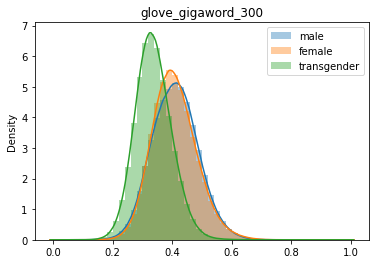

In [13]:
'''
Plot bias distribution
'''
import seaborn as sns
import matplotlib.pyplot as plt

for g in group_words:
    ax = sns.distplot(1-np.array(list(norm_bias_scores[g].values())),label=g)

plt.title("glove_gigaword_300")
plt.legend()
# plt.savefig("dist_glove_gigaword_300.pdf")
plt.show()

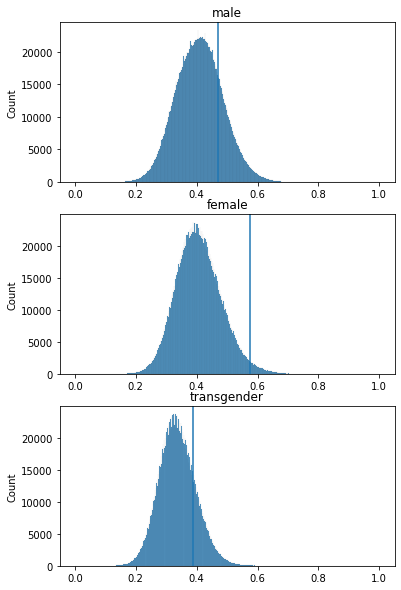

In [32]:
fig,ax = plt.subplots(3,1,figsize=(6,10))
i = 0
w= 'beautiful'
for g in group_words:
    sns.histplot(1-np.array(list(norm_bias_scores[g].values())),label=g, ax = ax[i])
    ax[i].axvline(x=1-norm_bias_scores[g][w])
    ax[i].set_title(g)
    i += 1

# plt.title("glove_gigaword_300")
# plt.legend()
# plt.savefig("dist_glove_gigaword_300.pdf")
plt.show()

In [291]:
g = "male"
w = "soft"
1-cosine(group_vectors[g],model[w])

0.03185676422224837

In [214]:
'''
Convert to a dataframe
'''

df = pd.DataFrame()
df['word'] = list(model.vocab.keys())
df['score'] = norm_bias_score
sorted = df.sort_values(by=['score'])

In [13]:
# Top 20 male words
sorted.iloc[-50:]

,word,score
2104,spokeswoman,0.792980
52227,Nicki,0.793575
2823644,Kristen_Suatoni,0.793873
23328,Mae,0.795062
176968,Betty_Lennox,0.795360
22308,feminist,0.796252
455207,Baranova,0.797739
101405,chanteuse,0.800714
53411,alumna,0.801904
1438937,C._Pizer,0.801904


In [14]:
# NLTK downloads for POS tagging
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/naimulhoque/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/naimulhoque/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [112]:
import nltk
from nltk.tokenize import word_tokenize

In [113]:
text = "Jenny is a pretty woman"

In [114]:
tokenized_texts = word_tokenize(text)

In [115]:
tokenized_texts

['Jenny', 'is', 'a', 'pretty', 'woman']

In [116]:
tagged_text = nltk.pos_tag(tokenized_texts)

In [117]:
tagged_text

[('Jenny', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pretty', 'JJ'),
 ('woman', 'NN')]

In [122]:
w = "creative"
v = model[w]/norm(model[w])
print("FeMale: ",euclidean(g1,v))
print("male: ",euclidean(g2,v))

FeMale:  1.1220746479001742
male:  1.1942301268189637


In [95]:
# g1

In [19]:
cosine(g2,model['sexy'])

0.5258278093930786

In [63]:
cosine(model['james'],model['beautiful'])

0.8976039066910744

In [130]:
df = pd.DataFrame()

In [145]:
adj = '''headstrong, thankless, tactful, distrustful, quarrelsome, 
effeminate, fickle, talkative, depend- able, resentful, sarcastic,
unassuming, changeable, resourceful, persevering, forgiving, assertive, 
individualistic, vindictive, sophisticated, deceitful, impulsive, sociable, 
methodical, idealistic, thrifty, outgoing, intolerant, au- tocratic, conceited, 
inventive, dreamy, appreciative, forgetful, forceful, submissive, pessimistic, 
versatile, adapt- able, reflective, inhibited, outspoken, quitting, unselfish, 
immature, painstaking, leisurely, infantile, sly, prais- ing, cynical, irresponsible, 
arrogant, obliging, unkind, wary, greedy, obnoxious, irritable, discreet, frivolous, 
cowardly, rebellious, adventurous, enterprising, unscrupulous, poised, moody, 
unfriendly, optimistic, disor- derly, peaceable, considerate, humorous, worrying,
preoccupied, trusting, mischievous, robust, superstitious, noisy, tolerant, realistic, 
masculine, witty, informal, prejudiced, reckless, jolly, courageous, meek, stubborn, aloof,
sentimental, complaining, unaffected, cooperative, unstable, feminine, timid, retiring, relaxed,
imagina- tive, shrewd, conscientious, industrious, hasty, commonplace, lazy, gloomy, thoughtful,
dignified, wholesome, affectionate, aggressive, awkward, energetic, tough, shy, queer, careless,
restless, cautious, polished, tense, suspicious, dissatisfied, ingenious, fearful, daring,
persistent, demanding, impatient, contented, selfish, rude, spontaneous, conventional, cheerful,
enthusiastic, modest, ambitious, alert, defensive, mature, coarse, charm- ing, clever, shallow,
deliberate, stern, emotional, rigid, mild, cruel, artistic, hurried, sympathetic, dull, civilized,
loyal, withdrawn, confident, indifferent, conservative, foolish, moderate, handsome, helpful,
gentle, dominant, hostile, generous, reliable, sincere, precise, calm, healthy, attractive,
progressive, confused, rational, stable, bitter, sensitive, initiative, loud, thorough, logical,
intelligent, steady, formal, complicated, cool, curious, re- served, silent, honest, quick, 
friendly, efficient, pleasant, severe, peculiar, quiet, weak, anxious, nervous, warm, slow, 
dependent, wise, organized, affected, reasonable, capable, active, independent, patient, practical, serious, 
understanding, cold, responsible, simple, original, strong, determined, natural, kind'''

In [159]:
occup = '''teacher, author, mechanic, broker, baker, surveyor, laborer, surgeon, gardener, painter, dentist, janitor, athlete, manager, conductor, carpenter, housekeeper, secretary, economist, geologist, clerk, doctor, judge, physician, lawyer, artist, instructor, dancer, photographer, inspector, musician, soldier, librarian, professor, psychologist, nurse, sailor, accountant, architect, chemist, administrator, physicist, scientist, farmer'''

In [169]:
tokenized_texts = word_tokenize(adj)

In [165]:
bias_min

-0.3329

In [166]:
bias_max

0.3706

In [234]:
print("Female: ",cosine(g2,model['guns']))

Female:  0.871455100978295


In [224]:
for w in tokenized_texts:
    try:
        print(w)
        if "," not in w:
            print("Female: ",cosine(g1,model[w.strip()]))
            print("male: ",cosine(g2,model[w.strip()]))
            print("transgender: ",cosine(g3,model[w.strip()]))
#             b = round(cosine(g1,model[w])-cosine(g2,model[w]),4)
# #             print("raw score: ",b)
#             if b<0:
#                 print("Male bias: ", b/bias_min)
#             else:
#                 print("Female bias: ", -1*b/bias_max)
    except Exception as e:
        print(e)
    

headstrong
Female:  0.7088133215378435
male:  0.6855457298233567
transgender:  0.7820846925324093
,
thankless
Female:  0.8395024029943656
male:  0.8526596924385155
transgender:  0.8484770595488905
,
tactful
Female:  0.8216241178960505
male:  0.8325600600530256
transgender:  0.789452391433446
,
distrustful
Female:  0.8620427334740162
male:  0.8843671253935321
transgender:  0.8158111024947285
,
quarrelsome
Female:  0.82020117619502
male:  0.8478044938779655
transgender:  0.7663775290757832
,
effeminate
Female:  0.6711584833215632
male:  0.7887711957610006
transgender:  0.567364841801159
,
fickle
Female:  0.9499064563352048
male:  0.9461457757880656
transgender:  0.8615813150858455
,
talkative
Female:  0.745751656704722
male:  0.8081874189307724
transgender:  0.8531470338726129
,
depend-
"word 'depend-' not in vocabulary"
able
Female:  0.9109613743010005
male:  0.9323587264071905
transgender:  0.9266928735197895
,
resentful
Female:  0.7418370487213827
male:  0.7556010750066511
transgender

reasonable
Female:  0.9801572295324567
male:  0.9835839840370791
transgender:  0.962015743942647
,
capable
Female:  0.904611746717639
male:  0.9947524157375203
transgender:  0.9343384128122565
,
active
Female:  0.9475636050385625
male:  0.9856363753288876
transgender:  0.8441646433517391
,
independent
Female:  0.9417103854323654
male:  0.9401642051322209
transgender:  0.8386694709757502
,
patient
Female:  0.857763850385757
male:  0.7932945415337338
transgender:  0.8514550748924687
,
practical
Female:  0.9495772861174886
male:  0.8883013128004178
transgender:  0.9023106510475869
,
serious
Female:  0.8570634671274329
male:  0.8935580396351194
transgender:  0.9368363966846875
,
understanding
Female:  0.9051027717091986
male:  0.9354906060460684
transgender:  0.8700083463871939
,
cold
Female:  0.896089136817669
male:  0.8533652994760209
transgender:  0.9111020025752061
,
responsible
Female:  0.9137991590481097
male:  0.9536437984718781
transgender:  0.9016445416773499
,
simple
Female:  0.9

In [183]:
ms=model.most_similar('transgender',topn=5)

In [184]:
ms

[('bisexual', 0.808045506477356),
 ('lgbt', 0.8021803498268127),
 ('lesbian', 0.7599321603775024),
 ('transgendered', 0.7305721044540405),
 ('transsexual', 0.6515378952026367)]